In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model

In [186]:
TD = pd.read_csv('TrainData.csv')
TD = TD[['TIMESTAMP', 'POWER']]


WFI = pd.read_csv('WeatherForecastInput.csv')
SOL = pd.read_csv('Solution.csv')

display(SOL)

,TIMESTAMP,POWER
0,20131101 1:00,0.167215
1,20131101 2:00,0.063998
2,20131101 3:00,0.039035
3,20131101 4:00,0.036232
4,20131101 5:00,0.064888
...,...,...
715,20131130 20:00,0.963328
716,20131130 21:00,0.948834
717,20131130 22:00,0.925991
718,20131130 23:00,0.773840


# kNN Method

In [189]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics, svm
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import math

X_train = TD.iloc[:,1].values
X_train = X_train[0:16078]
X_train = X_train.reshape(-1,1)

y_train = TD.iloc[:,1].values
y_train = y_train[1:16079]
y_train = y_train.reshape(-1,1)

X_test = SOL.iloc[:,1].values
#X_test = X_test[0:718]
X_test = X_test.reshape(-1,1)
y_test = SOL.iloc[:,1].values
y_test = y_test[1:719]



In [190]:
# LR Method
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

mse = mean_squared_error(X_test, y_pred_lr)
#print("Mean Squared Error:",mse)
rmse = math.sqrt(mse)
print("Root Mean Squared Error LR:", rmse)

# KNN Method
knn = KNeighborsRegressor(n_neighbors=6)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

mse = mean_squared_error(X_test, y_pred_knn)
#print("Mean Squared Error:",mse)
rmse = math.sqrt(mse)
print("Root Mean Squared Error kNN:", rmse)


# SVR Method
svr = svm.SVR()
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

mse = mean_squared_error(X_test, y_pred_svr)
#print("Mean Squared Error:",mse)
rmse = math.sqrt(mse)
print("Root Mean Squared Error SVR:", rmse)


# ANN MEthod
mlp = MLPRegressor(max_iter = 1000, activation = 'relu')
mlp.fit(X_train, y_train)
y_pred_ann = mlp.predict(X_test)

mse = mean_squared_error(X_test, y_pred_ann)
#print("Mean Squared Error:",mse)
rmse = math.sqrt(mse)
print("Root Mean Squared Error ANN:", rmse)



Mean Squared Error: 0.00023656302797786668
Root Mean Squared Error LR: 0.015380605579035783
Mean Squared Error: 0.0022018863548211153
Root Mean Squared Error kNN: 0.046924261899587885


C:\Users\kaspe\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Mean Squared Error: 0.001853828149461293
Root Mean Squared Error SVR: 0.043056104671246015


C:\Users\kaspe\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Mean Squared Error: 0.00022390460236857562
Root Mean Squared Error ANN: 0.014963442196519343


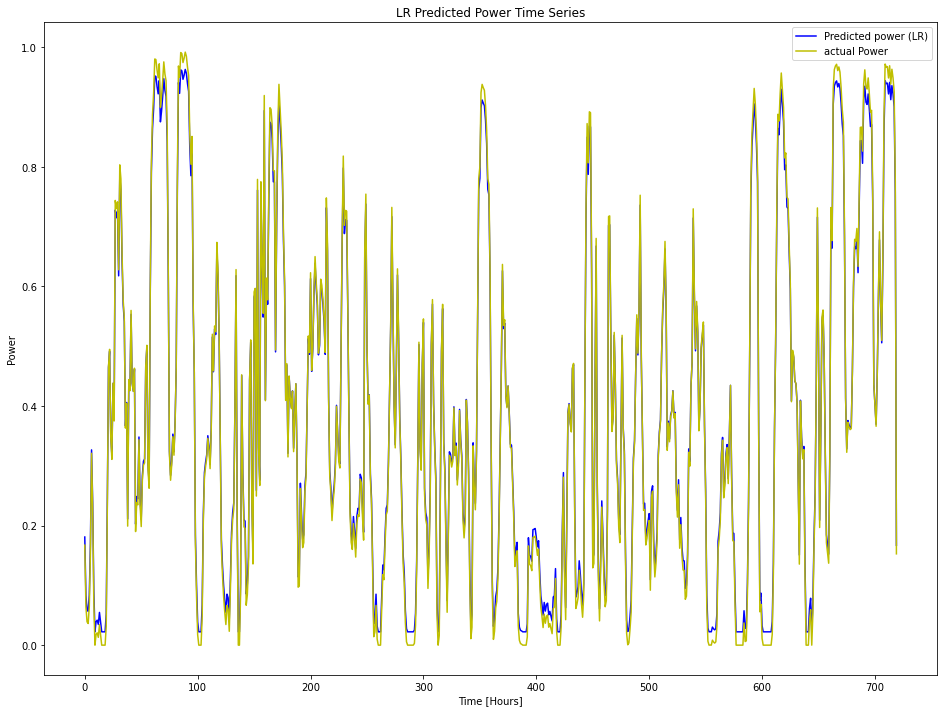

In [181]:
SOL['Index'] = SOL.index
x = SOL['Index']
y = SOL['POWER']

plt.plot(x,y_pred_lr, label = 'Predicted power (LR)', color = 'b')
plt.plot(x,y, label = 'actual Power', color = 'y')

plt.xlabel('Time [Hours]')
plt.ylabel('Power')
plt.rcParams['figure.figsize'] = [16, 12]
plt.title('LR Predicted Power Time Series')
plt.legend()
plt.show()

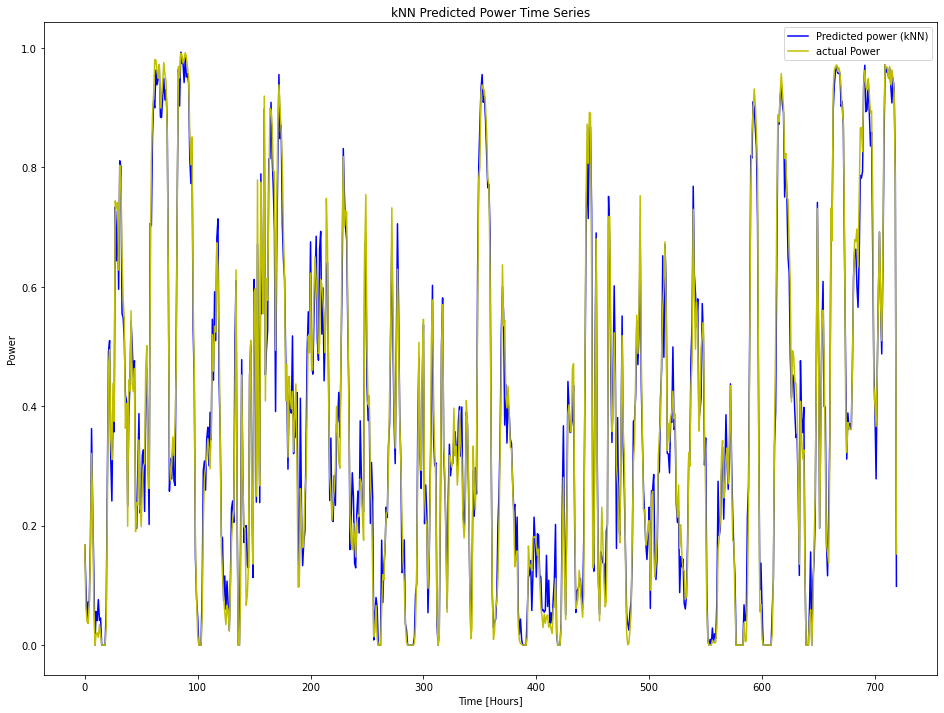

In [182]:
plt.plot(x,y_pred_knn, label = 'Predicted power (kNN)', color = 'b')
plt.plot(x,y, label = 'actual Power', color = 'y')

plt.xlabel('Time [Hours]')
plt.ylabel('Power')
plt.rcParams['figure.figsize'] = [16, 12]
plt.title('kNN Predicted Power Time Series')
plt.legend()
plt.show()

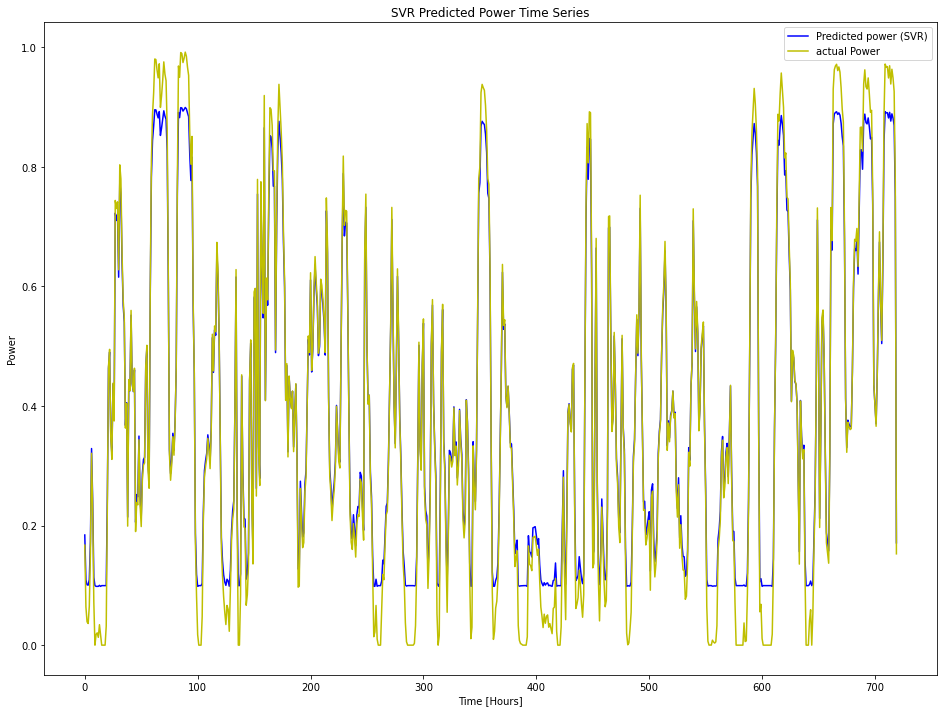

In [183]:
plt.plot(x,y_pred_svr, label = 'Predicted power (SVR)', color = 'b')
plt.plot(x,y, label = 'actual Power', color = 'y')

plt.xlabel('Time [Hours]')
plt.ylabel('Power')
plt.rcParams['figure.figsize'] = [16, 12]
plt.title('SVR Predicted Power Time Series')
plt.legend()
plt.show()

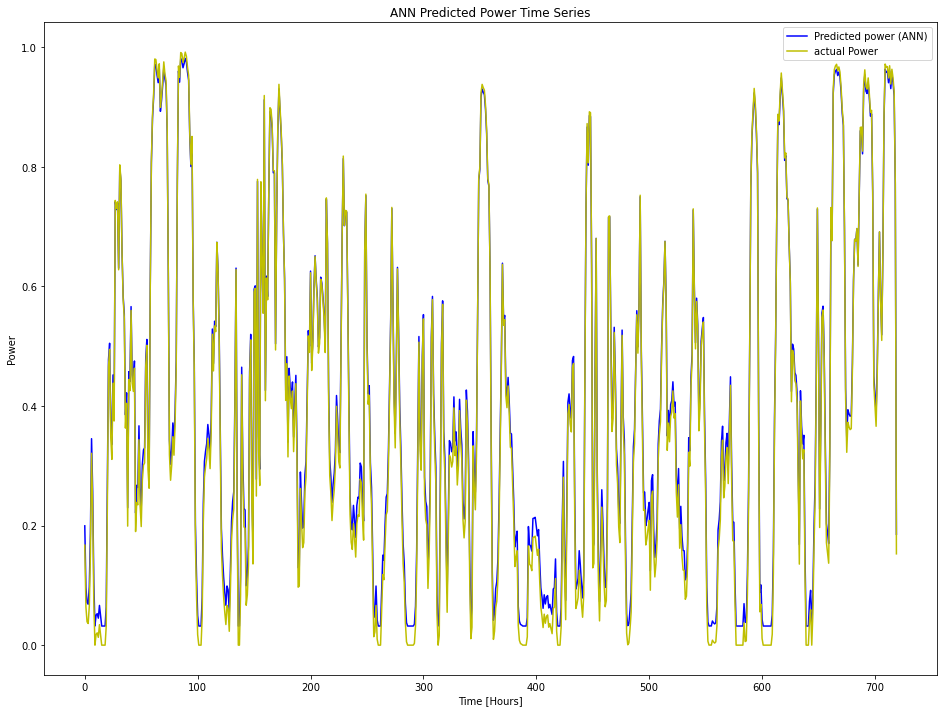

In [184]:
plt.plot(x,y_pred_ann, label = 'Predicted power (ANN)', color = 'b')
plt.plot(x,y, label = 'actual Power', color = 'y')

plt.xlabel('Time [Hours]')
plt.ylabel('Power')
plt.rcParams['figure.figsize'] = [16, 12]
plt.title('ANN Predicted Power Time Series')
plt.legend()
plt.show()